For one chosen setting of parameters (e.g. a = 2, ρ = 0.5) generate a scatter plot showing observations from training set.

Mark observations belonging to different classes using two different colors and two different symbols.

Draw curves that separate classes for LDA and QDA. Save the results in the file BayesianSimulatedData3.pdf


In [61]:
import matplotlib.pyplot as plt
import numpy as np

from tools import generate_y, generate_data_1, generate_data_2
from tools import train_test_split

from BinaryClassifiers import BinaryClassifier, LDA, QDA, NaiveBayes


In [62]:
np.random.seed(1337)


In [63]:
prob = 0.5
n = 1000

mean = 0
variance = 1


alpha = 3
rho = 0.7

models = (LDA, QDA, NaiveBayes)


In [64]:
def draw_all(
        models: list[BinaryClassifier],
        datasets: list[np.array]
        ) -> None:

    fig, axs = plt.subplots(3, 2, figsize=(20, 30))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for j, data in enumerate(datasets):
        train, _, = train_test_split(data, 0.7)

        for i, model in enumerate(models):
            model_instance: BinaryClassifier = model()
            model_instance.fit(train[:, 1:], train[:, 0])

            axs[i, j].set_title(f"{model_instance.name} - dataset {j}")

            xx, yy, z = model_instance.find_border()
            contour = axs[i, j].contour(xx, yy, z)
            axs[i, j].clabel(contour, fontsize=0)
            axs[i, j].plot(
                [], [], "g",
                label=f"{model_instance.name} border line"
                )

            y0 = data[:, 0] == 0
            axs[i, j].scatter(
                data[y0][:, 1],
                data[y0][:, 2],
                color="green",
                marker="*",
                label="Class 0"
                )

            y1 = data[:, 0] == 1
            axs[i, j].scatter(
                data[y1][:, 1],
                data[y1][:, 2],
                color="orange",
                marker="o",
                label="Class 1"
                )

            axs[i, j].legend()
            axs[i, j].set_xlabel("Feature 1 value")
            axs[i, j].set_ylabel("Feature 2 value")

    plt.savefig("plots/models_comparation_0_1_datasets.jpg")
    plt.show()


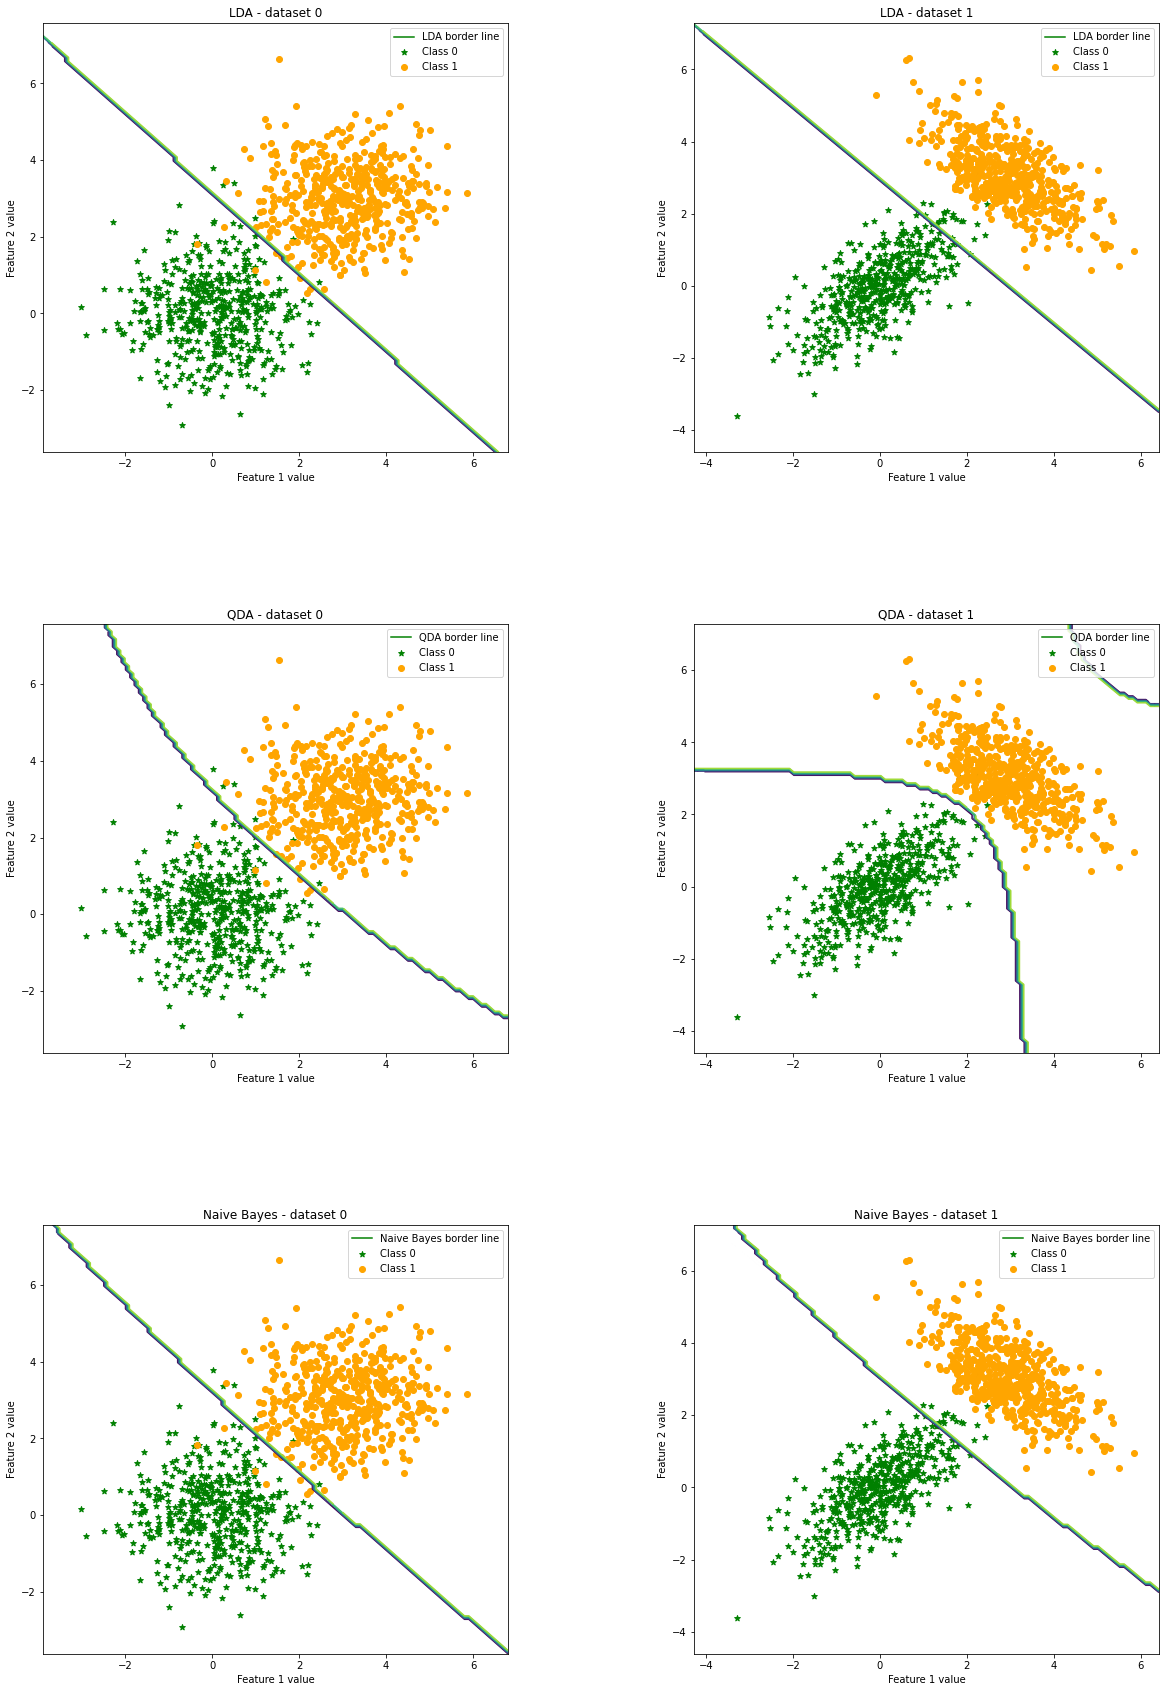

In [65]:
y = generate_y(prob, n)
data_1 = generate_data_1(y, mean, alpha, variance)
data_2 = generate_data_2(y, rho, alpha)

draw_all((LDA, QDA, NaiveBayes), (data_1, data_2))


It can be seen here that QDA performs best due to its quadratic form.

LDA is the worst due to its rigid linearity, and Naive Bayes is slightly better.
